In [36]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()
os.chdir( "C:/Users/Miray/Desktop")
os.getcwd()

'C:\\Users\\Miray\\Desktop'

In [37]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error
from warnings import filterwarnings
filterwarnings('ignore')

**Bu notebook'ta, Finans datası ile yapılan KMeans modeli ve 
Kmeans modeli sonrası oluşan küme sayılarını class kabul edip, fit edilen Naive Bayes modeli sonucu bulunmaktadır.**


In [38]:
odv=pd.read_csv("odev.csv")
df=odv.copy()
df.head()


,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [39]:
kat_df=df.select_dtypes(include=["object"])
kat_df.head()

,ind_109,ind_420,ind_422
0,GREEN,-152,-353
1,GREEN,-158,-359
2,GREEN,-160,-362
3,GREEN,-166,-367
4,GREEN,-186,-388


In [40]:
df.loc[df[df["ind_420"] == "?"].index] = np.nan 

In [41]:
df["ind_422"] = df["ind_422"].astype('float64')
df["ind_420"] = df["ind_420"].astype('float64')
df.dropna()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19.0,17.0,100.000000,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54.0,-152.0,-353.0,1.000000,0.498547,0.701906,15.135802,35.625252,36.997753
1,24.0,19.0,100.000000,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60.0,-158.0,-359.0,1.000000,0.537088,0.690833,15.143348,35.643013,37.016198
2,30.0,24.0,100.000000,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60.0,-160.0,-362.0,1.000000,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37.0,30.0,100.000000,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65.0,-166.0,-367.0,1.000000,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41.0,37.0,100.000000,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86.0,-186.0,-388.0,1.000000,0.747204,0.700522,-15.179065,-35.727079,-37.103503
5,45.0,41.0,100.000000,50.000000,50.000000,80.092497,74.144360,18.75,12.74,15.18,...,-78.1,-84.0,-185.0,-386.0,1.000000,0.794403,0.730549,-15.176927,-35.722047,-37.098277
6,49.0,45.0,100.000000,42.857143,57.142857,79.625649,73.412327,15.45,13.52,15.84,...,-71.7,-84.0,-184.0,-386.0,1.000000,0.854144,0.746727,-15.176298,-35.720567,-37.096740
7,51.0,49.0,92.857143,35.714286,57.142857,77.015062,69.155269,11.55,13.86,15.86,...,-69.0,-81.0,-181.0,-383.0,0.432099,0.832974,0.723536,-15.172902,-35.712575,-37.088440
8,52.0,51.0,85.714286,28.571429,57.142857,71.153131,58.458047,9.05,14.02,14.39,...,-62.7,-75.0,-175.0,-377.0,0.000000,0.908407,0.705342,-15.164979,-35.693926,-37.069073
9,49.0,52.0,78.571429,21.428571,57.142857,71.849045,59.819306,8.40,11.26,11.59,...,-64.6,-77.0,-177.0,-379.0,0.000000,0.833898,0.690449,-15.167369,-35.699550,-37.074913


In [42]:
for i in df.select_dtypes(include=["object"]).columns:
    print(i,": ",df[i].value_counts().count())

ind_109 :  2


In [43]:
df.dropna(axis=0,inplace=True)

In [44]:
df.isnull().values.any()

False

In [45]:
dms=pd.get_dummies(df[['ind_109']])
dms.head()

,ind_109_GREEN,ind_109_RED
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [46]:
X_=df.drop(["ind_109","90_target","50_target","20_target"],axis=1).astype("float64")
# X'in alacağı değerlerden kategorikleri ve hedef değişkeni sildik.
X_.head()
X=pd.concat([X_,dms[["ind_109_GREEN"]]],axis=1) #dummy haliyle concat yaparak bağımsız değişken dataframe'i oluşturduk.
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,ind_109_GREEN
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,0.002371,2.0,-49.6,-54.0,-152.0,-353.0,1.0,0.498547,0.701906,1
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.003074,0.8,-55.6,-60.0,-158.0,-359.0,1.0,0.537088,0.690833,1
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,0.003561,2.7,-58.4,-60.0,-160.0,-362.0,1.0,0.615169,0.693040,1
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.004366,0.9,-61.8,-65.0,-166.0,-367.0,1.0,0.661517,0.673418,1
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.004198,0.1,-79.8,-86.0,-186.0,-388.0,1.0,0.747204,0.700522,1


In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
scaler.transform(X)


array([[0.75      , 0.74      , 1.        , ..., 0.49854651, 0.78773616,
        1.        ],
       [0.775     , 0.75      , 1.        , ..., 0.53708791, 0.77362977,
        1.        ],
       [0.805     , 0.775     , 1.        , ..., 0.61516854, 0.77644125,
        1.        ],
       ...,
       [0.75      , 0.765     , 0.42857143, ..., 0.63210702, 0.59646706,
        1.        ],
       [0.75      , 0.75      , 1.        , ..., 0.73300971, 0.64719907,
        1.        ],
       [0.75      , 0.75      , 0.92857143, ..., 0.6875    , 0.65019551,
        1.        ]])

In [48]:
data=X.copy()

In [49]:
data.describe()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,ind_109_GREEN
count,5126.000000,5126.000000,5126.000000,5126.000000,5126.000000,5126.000000,5126.000000,5126.000000,5126.000000,5126.000000,...,5126.000000,5126.000000,5126.000000,5126.000000,5126.000000,5126.000000,5126.000000,5126.000000,5126.000000,5126.000000
mean,-1.251853,-1.240148,49.016220,48.042194,0.974026,49.390674,-19.224494,11.535369,11.534826,11.537054,...,0.000379,28.205853,-8.886110,-27.631291,30.055989,-153.177917,0.488696,0.496659,0.487013,0.509949
std,23.546553,23.550694,36.340676,36.619184,60.375932,12.167460,69.771370,6.827354,5.830031,5.016266,...,0.005863,27.051083,16.528257,22.660055,117.967626,124.342634,0.425102,0.231322,0.151328,0.499950
min,-131.000000,-131.000000,0.000000,0.000000,-100.000000,12.134540,-625.093855,1.050000,1.660000,2.580000,...,-0.023790,0.000000,-103.800000,-188.000000,-349.000000,-594.000000,0.000000,0.000000,0.083530,0.000000
25%,-14.000000,-14.000000,14.285714,14.285714,-50.000000,40.900097,-45.498203,6.612500,6.960000,7.380000,...,-0.003033,10.300000,-12.575000,-38.000000,-30.000000,-231.750000,0.000000,0.316777,0.373447,0.000000
50%,0.000000,0.000000,50.000000,42.857143,7.142857,49.717560,-2.136178,10.250000,10.720000,11.010000,...,0.000069,20.700000,0.000000,-22.000000,35.000000,-143.000000,0.472798,0.494094,0.490489,1.000000
75%,13.000000,13.000000,85.714286,85.714286,57.142857,58.419281,27.823637,14.700000,14.800000,14.660000,...,0.003628,37.675000,0.000000,-11.000000,116.000000,-67.000000,1.000000,0.677657,0.600395,1.000000
max,69.000000,69.000000,100.000000,100.000000,100.000000,82.351402,77.569159,82.900000,54.240000,37.050000,...,0.023340,281.800000,0.000000,0.000000,297.000000,124.000000,1.000000,1.000000,0.868534,1.000000


In [15]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
k_fit=kmeans.fit(data)
kumeler=k_fit.labels_
kumeler

array([3, 3, 3, ..., 3, 3, 3])

In [16]:
merkezler=kmeans.cluster_centers_
merkezler

array([[-1.29598145e+00, -2.95054096e+00,  5.51998234e+01,
         3.62166041e+01,  1.89832193e+01,  5.17078488e+01,
         3.03344252e+00,  1.00721793e+01,  1.02318547e+01,
         1.04272025e+01,  1.06200052e+01,  1.15341634e+01,
        -7.78207110e-01, -5.37403400e+00, -4.59737249e+00,
        -1.33183926e+01,  2.55448223e+01,  1.56323720e-03,
        -2.03752322e-03, -2.37140025e-04,  2.15352911e+01,
         5.23615501e+01,  6.91806496e+01,  6.63246889e+01,
         5.70440314e+01,  3.41511636e+01,  1.51100501e+01,
         4.07554695e-02, -4.47973914e+01, -6.55959762e+01,
         1.21218466e+01,  3.11051005e+00,  4.14534608e+00,
        -1.38562597e+00, -3.17387944e+00, -5.18083462e+00,
        -6.11823802e+00, -6.29211747e+00, -4.51545595e+00,
        -1.31221020e+00,  2.16537867e+00,  1.87132921e+01,
         3.18523957e+01, -3.09505410e+00,  6.43353941e+00,
         6.62982998e+00, -1.40803709e+00, -4.28902628e-01,
         2.54868624e+00, -4.08809892e-01,  4.15765070e-0

In [18]:
data["kume_no"]=kumeler
data.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,ind_109_GREEN,kume_no
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,2.0,-49.6,-54.0,-152.0,-353.0,1.0,0.498547,0.701906,1,3
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.8,-55.6,-60.0,-158.0,-359.0,1.0,0.537088,0.690833,1,3
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,2.7,-58.4,-60.0,-160.0,-362.0,1.0,0.615169,0.693040,1,3
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.9,-61.8,-65.0,-166.0,-367.0,1.0,0.661517,0.673418,1,3
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.1,-79.8,-86.0,-186.0,-388.0,1.0,0.747204,0.700522,1,3


In [23]:
columns = ['kume_no']
data.drop(columns, inplace=True, axis=1)


KeyError: "['kume_no'] not found in axis"

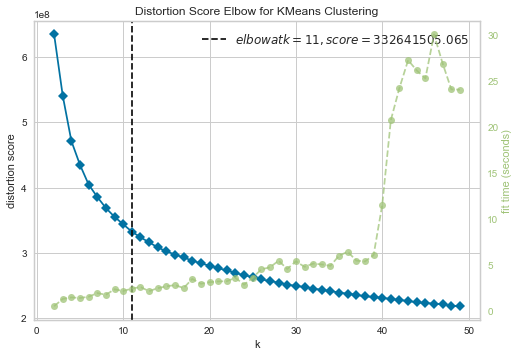

In [22]:
from yellowbrick.cluster import KElbowVisualizer
kmeans=KMeans()
visulizer=KElbowVisualizer(kmeans,k=(2,50))
visulizer.fit(data)
visulizer.poof()

In [25]:
from sklearn.cluster import KMeans
kmeanss=KMeans(n_clusters=8)
k_fitt=kmeanss.fit(data)
kumeler=k_fitt.labels_
kumeler

array([2, 2, 2, ..., 5, 2, 2])

In [26]:
merkezler=k_fitt.cluster_centers_
merkezler

array([[-3.02614108e+01, -2.64709544e+01,  2.85121517e+01, ...,
         1.96849566e-01,  3.08824278e-01,  4.35684647e-02],
       [-7.95141700e+00, -1.00728745e+01,  4.48139580e+01, ...,
         5.58094676e-01,  4.22236963e-01,  7.90823212e-01],
       [ 2.52868339e+01,  2.30611285e+01,  8.60501567e+01, ...,
         7.57623863e-01,  6.64426935e-01,  8.79310345e-01],
       ...,
       [ 1.35066445e+01,  1.44667774e+01,  4.85999051e+01, ...,
         5.68372179e-01,  6.04505308e-01,  4.75083056e-01],
       [-2.31675000e+01, -2.36775000e+01,  2.06785714e+01, ...,
         3.48391102e-01,  3.46691908e-01,  4.58750000e-01],
       [ 1.16225166e+01,  1.29635762e+01,  5.41745506e+01, ...,
         5.15615408e-01,  5.61958045e-01,  2.03642384e-01]])

In [27]:
data["kume_no"]= kumeler

In [28]:
data.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,ind_109_GREEN,kume_no
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,2.0,-49.6,-54.0,-152.0,-353.0,1.0,0.498547,0.701906,1,2
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.8,-55.6,-60.0,-158.0,-359.0,1.0,0.537088,0.690833,1,2
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,2.7,-58.4,-60.0,-160.0,-362.0,1.0,0.615169,0.693040,1,2
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.9,-61.8,-65.0,-166.0,-367.0,1.0,0.661517,0.673418,1,2
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.1,-79.8,-86.0,-186.0,-388.0,1.0,0.747204,0.700522,1,2


In [51]:
from scipy.cluster.hierarchy import linkage
hc_complete=linkage(data,"complete")
hc_avarage=linkage(data,"average")
hc_single=linkage(data,"single")


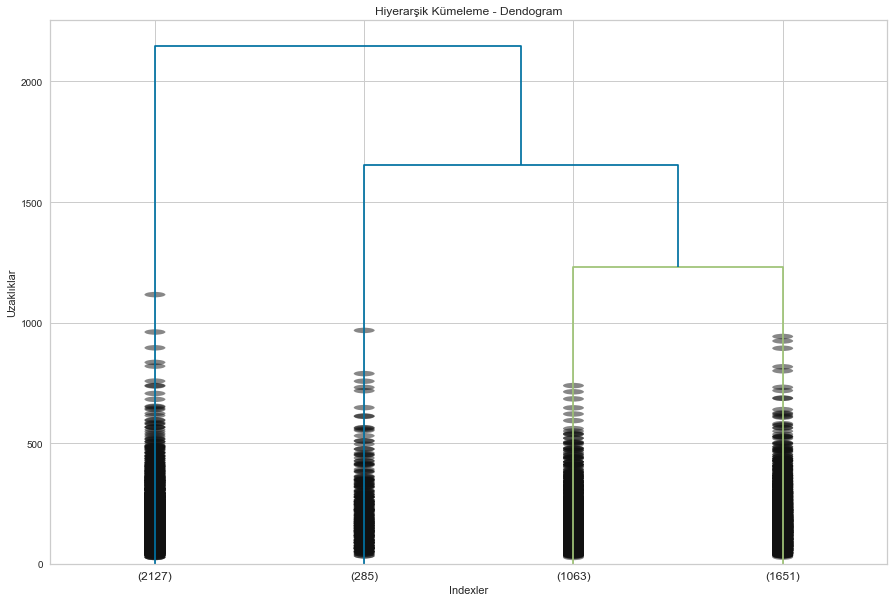

In [53]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(15,10))
plt.title("Hiyerarşik Kümeleme - Dendogram")
plt.xlabel('Indexler')
plt.ylabel('Uzaklıklar')
dendrogram(
    hc_complete,
    truncate_mode= "lastp",
    p=4,
    show_contracted=True
);

**Kumeleri Sınıf olarak kabul edip Naive Bayes uygulayalım**

In [32]:
y=data["kume_no"]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
scaler.transform(X)
X=scaler.transform(X)
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30, random_state=42,shuffle=False)
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb_model=mnb.fit(X_train,y_train)
mnb_model
y_pred=mnb_model.predict(X_test)
accuracy_score(y_pred,y_test)


0.6684005201560468

In [33]:
mnb_model.predict_proba(X_test)[0:10]

array([[5.52585171e-04, 5.58779400e-01, 3.28540282e-03, 1.01019417e-01,
        5.33529769e-03, 5.31403444e-03, 2.89553394e-01, 3.61604696e-02],
       [6.33107252e-04, 5.42191367e-01, 2.29617104e-03, 8.10683430e-02,
        5.88697194e-03, 4.20883862e-03, 3.38663790e-01, 2.50514116e-02],
       [5.18222456e-06, 7.12173847e-01, 4.47902777e-03, 1.38251685e-01,
        3.76330098e-04, 2.43703151e-03, 1.38135008e-01, 4.14188786e-03],
       [7.09055400e-06, 6.71731697e-01, 7.48724106e-03, 2.11998306e-01,
        4.74188900e-04, 3.85308285e-03, 9.47963261e-02, 9.65206743e-03],
       [2.67763551e-06, 6.69099796e-01, 8.85932192e-03, 2.39812045e-01,
        2.61287304e-04, 3.48760783e-03, 7.17975195e-02, 6.67974449e-03],
       [1.13093222e-06, 7.11182022e-01, 6.80894831e-03, 2.04579717e-01,
        8.62357191e-05, 1.95059120e-03, 7.22210564e-02, 3.17029900e-03],
       [3.30878110e-06, 6.58000014e-01, 8.83608498e-03, 2.61457110e-01,
        1.68935258e-04, 2.79269777e-03, 6.15525441e-02, 7.

In [34]:
print(classification_report(y_test,y_pred)," Test Seti Sonuclari")

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       147
           1       0.66      0.77      0.71       221
           2       0.83      0.76      0.79       191
           3       0.56      0.65      0.60       194
           4       0.82      0.50      0.62       204
           5       0.70      0.20      0.32       191
           6       0.59      0.93      0.73       220
           7       0.58      0.69      0.63       170

    accuracy                           0.67      1538
   macro avg       0.69      0.67      0.65      1538
weighted avg       0.69      0.67      0.65      1538
  Test Seti Sonuclari


In [35]:
confusion_matrix(y_test,y_pred) 

array([[122,   0,   0,   0,   2,   0,  23,   0],
       [  0, 171,   0,   4,   0,   1,  39,   6],
       [  0,   1, 145,  37,   0,   6,   0,   2],
       [  0,  48,  15, 127,   0,   1,   0,   3],
       [ 19,   7,   0,   0, 102,   1,  61,  14],
       [  0,   7,  15,  55,  14,  39,   1,  60],
       [  7,   8,   0,   0,   0,   0, 205,   0],
       [  0,  17,   0,   5,   7,   8,  16, 117]], dtype=int64)

**Normalde Target 90 hedef değişken olarak uygulandığında yani 3 sınıf olduğunda accuracy sonucu 0.54 olarak bulunmuştu,
bulunan küme sayısı sınıfa çevrildiğinde, 8 sınıf olmuş ve  Naive Bayes sonucu 0.67'ye yükselmiştir.**